In [11]:
import sys
print(sys.path)
sys.path.append('/home/zinovyev/anaconda3/lib/python3.7/site-packages')
print(sys.path)

['/mnt/c/Datas/SingleCellTranscriptomics/RNAVelocity', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/home/zinovyev/.local/lib/python3.7/site-packages', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/home/zinovyev/.local/lib/python3.7/site-packages/IPython/extensions', '/home/zinovyev/.ipython']
['/mnt/c/Datas/SingleCellTranscriptomics/RNAVelocity', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/home/zinovyev/.local/lib/python3.7/site-packages', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/home/zinovyev/.local/lib/python3.7/site-packages/IPython/extensions', '/home/zinovyev/.ipython', '/home/zinovyev/anaconda3/lib/python3.7/site-packages']


In [263]:
import numpy as np
import pandas as pd
import elpigraph_ps_tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import skdim
from scipy.stats.mstats import winsorize
from scipy import stats

mpl.rcParams['figure.dpi'] = 200

In [2]:
cell_cycle_genes_file = '/mnt/c/Datas/MOSAIC/expression/chromium_data/final/data/cell_cycle_genes.txt'
cell_cycle_genes = []

with open(cell_cycle_genes_file,'r') as fin:
    ln = fin.readline()[:-1]
    while ln:
        cell_cycle_genes.append(ln)
        ln = fin.readline()[:-1]
print(len(cell_cycle_genes),' cell cycle genes')

298  cell cycle genes


In [3]:
import numpy as np


#folder = '/mnt/c/Datas/SingleCellTranscriptomics/EwingSarcoma_Miller2020/'
folder = '/mnt/c/Datas/MOSAIC/expression/chromium_data/final/data/'

prefix = 'D085T8'
#prefix = 'TC71'
prefix1 = '_nufp10k.txt'

#fn = folder+prefix+'/'+prefix+'.txt'
fn = folder+prefix+prefix1

gene_names = []
sample_names = []

only_cell_cycle_genes = False
restricted_set = set()
if only_cell_cycle_genes:
    restricted_set = set(cell_cycle_genes)

k=0
gene_names_inds = []
with open(fn,'r') as fid:
    ln = fid.readline()[:-1].strip('\t')
    sample_names = ln.split('\t')[1:]
    ln = fid.readline()[:-1].strip('\t')
    while ln:
        parts = ln.split('\t')
        if only_cell_cycle_genes:
            if(parts[0] in restricted_set):
                gene_names.append(parts[0])
                gene_names_inds.append(k)           
        else:
            gene_names.append(parts[0])
            gene_names_inds.append(k)
        k = k+1
        ln = fid.readline()[:-1].strip('\t')
        
print('Number of genes :{}, Number of samples :{}'.format(len(gene_names),len(sample_names)))
        
matrix = np.zeros((len(gene_names),len(sample_names)))

gene_names_inds_set = set(gene_names_inds)
                  
with open(fn,'r') as fid:
    ln = fid.readline()[:-1].strip('\t')
    ln = fid.readline()[:-1].strip('\t')
    k = 0
    k1 = 0
    while ln:
        parts = ln.split('\t')
        gn = parts[0]
        if k in gene_names_inds_set:
            for i,s in enumerate(parts[1:]):
                matrix[k1,i] = float(s)
            k1 = k1+1
        k = k+1
        ln = fid.readline()[:-1].strip('\t')


Number of genes :10000, Number of samples :1131


In [4]:
import pandas as pd

module_file = folder+prefix+'_nufp2k.txt.moduleAverages'

df = pd.read_csv(module_file,delimiter='\t')

display(df)

SAMPLE      IC1+      IC2+  MOMP_REGULATION  MODULE_E2F1  \
0     AAACCTGCATCTCCCA  0.470270  0.691712         0.608077     0.725078   
1     AAACGGGCAGACAGGT  0.743635  0.731778         0.677786     0.664266   
2     AAACGGGCAGGACCCT  0.513572  0.594215         0.657008     0.527769   
3     AAACGGGGTCAGAAGC  0.288355  0.506485         0.380257     0.553701   
4     AAACGGGGTGACGGTA  0.259897  0.445467         0.470484     0.641031   
...                ...       ...       ...              ...          ...   
1126  TTTGTCAGTATGCTTG  0.308655  0.539116         0.433870     0.635606   
1127  TTTGTCAGTCTCGTTC  0.277478  0.519416         0.661786     0.670980   
1128  TTTGTCAGTGCACTTA  0.928682  0.550230         0.696846     0.556325   
1129  TTTGTCATCCCTTGTG  0.496134  0.745830         0.599729     0.550244   
1130  TTTGTCATCGAATGCT  0.905777  0.848642         0.665729     0.425708   

      MODULE_MAPK  MODULE_P21CIP  HEDGEHOG  G2_CC_PHASE  MODULE_E2F4  ...  \
0        0.586862       0.826648  0.635406     0.391675     0.630955  ...   
1        0.567677       0.948824  0.677432     0.550702     0.632701  ...   
2        0.615285       0.719765  0.642353     0.395797     0.356028  ...   
3        0.395468       0.499133  0.412266     0.233994     0.000000  ...   
4        0.489984       0.808261  0.553282     0.180726     0.390485  ...   
...           ...            ...       ...          ...          ...  ...   
1126     0.494815       0.421733  0.526919     0.241614     0.718569  ...   
1127     0.594626       0.716730  0.593656     0.296594     0.401691  ...   
1128     0.616542       0.341652  0.704100     0.961648     0.841068  ...   
1129     0.560873       0.500883  0.596749     0.333498     0.428950  ...   
1130     0.672508       0.916028  0.663060     0.710850     0.295463  ...   

      D085T8_IC4  D085T8_IC5  D085T8_IC6  D085T8_IC7  D085T8_IC7-  D085T8_IC8  \
0       0.572757    0.530368    1.060744    0.798782     0.333878    0.476329   
1       0.494828    0.481532    1.030905    0.807566     0.318776    0.464347   
2       0.561190    0.566966    1.076129    0.725992     0.627278    0.687745   
3       0.730816    0.549350    1.015307    0.412071     0.781696    0.696165   
4       0.497871    0.556314    1.081953    0.867976     0.387190    0.856647   
...          ...         ...         ...         ...          ...         ...   
1126    0.454893    0.901023    0.789347    0.768281     0.328441    0.562325   
1127    0.552133    0.497061    1.062220    0.813131     0.475014    1.003692   
1128    0.464484    0.520720    0.967078    0.736573     0.300992    0.509913   
1129    0.525362    0.654331    0.946388    0.755304     0.287390    0.478173   
1130    0.467888    0.480362    0.933359    0.692664     0.295908    0.410559   

      D085T8_IC9  TOTAL_COUNTS  MIT_SCORE  Unnamed: 192  
0       1.022146         14192   0.883077           NaN  
1       0.927210          9808   0.970308           NaN  
2       1.059627          9110   0.986384           NaN  
3       1.166897          6451   0.732154           NaN  
4       0.916849          4435   0.781308           NaN  
...          ...           ...        ...           ...  
1126    0.991737          8209   0.425000           NaN  
1127    0.813318          6435   0.883077           NaN  
1128    0.812320         10988   0.975846           NaN  
1129    0.830542          6618   0.756154           NaN  
1130    0.732246          9924   0.768231           NaN  

[1131 rows x 193 columns]

In [223]:
metadata_file = '/mnt/c/Datas/SingleCellTranscriptomics/Retinoblastoma/RBSC11/meta.data.txt'
metadata = pd.read_csv(metadata_file,delimiter='\t')

metadataC0 = metadata.loc[metadata['label'] == 'C0']
cells_C0 = list(metadataC0.CELL)
print('C0 cells:',len(cells_C0))

metadataC2 = metadata.loc[metadata['label'] == 'C2']
cells_C2 = list(metadataC2.CELL)
print('C2 cells:',len(cells_C2))

metadataC3 = metadata.loc[metadata['label'] == 'C3']
cells_C3 = list(metadataC3.CELL)
print('C3 cells:',len(cells_C3))


metadataC1 = metadata.loc[metadata['label'] == 'C1']
cells_C1 = list(metadataC1.CELL)
print('C1 cells:',len(cells_C1))

metadataC5 = metadata.loc[metadata['label'] == 'C5']
cells_C5 = list(metadataC5.CELL)
print('C5 cells:',len(cells_C5))

cells_all = df.SAMPLE
indsC0 = np.argwhere(np.isin(cells_all,cells_C0))
indsC2 = np.argwhere(np.isin(cells_all,cells_C2))
indsC1 = np.argwhere(np.isin(cells_all,cells_C1))
indsC5 = np.argwhere(np.isin(cells_all,cells_C5))
indsC3 = np.argwhere(np.isin(cells_all,cells_C3))

C0 cells: 378
C2 cells: 226
C3 cells: 146
C1 cells: 292
C5 cells: 93


In [248]:
from sklearn.decomposition import PCA

print(matrix.shape)
pca = PCA(n_components=50)
u = pca.fit_transform(matrix.transpose())
v = v = pca.components_.T
s = pca.explained_variance_

X_pca = u

(10000, 1131)


In [6]:
print(v.shape)

with open(folder+prefix+prefix1+'_pca_metagenes.txt','w') as fid:
    cols = []
    for i in range(0,10):
        cols.append('PC{}'.format(i+1))
    fid.write('GENE\t'+'\t'.join(cols)+'\n')
    for k,g in enumerate(gene_names):
        vals = ['{}'.format(v[k,j]) for j in range(0,10)]
        fid.write(g+'\t'+'\t'.join(vals)+'\n')
        
with open(folder+prefix+prefix1+'_pca_coords.txt','w') as fid:
    cols = []
    for i in range(0,10):
        cols.append('PC{}'.format(i+1))
    fid.write('CELL\t'+'\t'.join(cols)+'\n')
    for k,g in enumerate(sample_names):
        vals = ['{}'.format(u[k,j]) for j in range(0,10)]
        fid.write(g+'\t'+'\t'.join(vals)+'\n')

(10000, 1131)


In [6]:
import umap
reducer = umap.UMAP()
umap_coords = reducer.fit_transform(matrix.transpose())


/home/zinovyev/.local/lib/python3.7/site-packages/numba/errors.py:137: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


Text(0, 0.5, 'UMAP2')

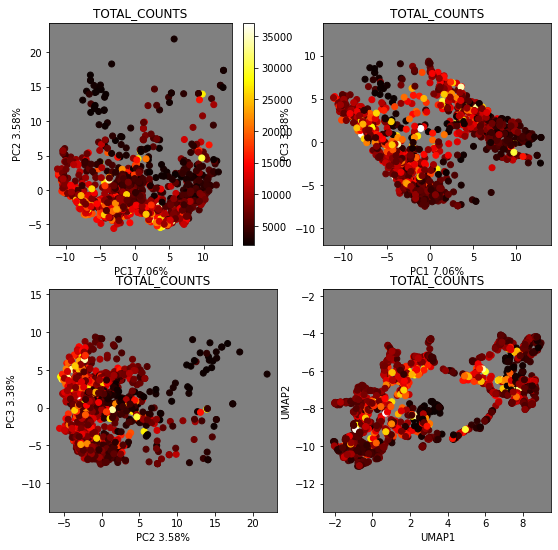

In [7]:
import matplotlib.pyplot as plt

#plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'grey'

#score_name = 'PID138045_HIF1alpha_transcription_factor_network'
#score_name = 'REACTOME1269960_Glycolysis'
#score_name = 'COL6A1_COL6A2_correlated'
#score_name = 'Lessnick_EWS-FLI_Up'
#score_name = 'GO0000398_mRNA_splicing_via_spliceosome'
#score_name = 'M13867_CDH1kd'
#score_name = 'CASPASES'
#score_name = 'GO0045333_cellular_respiration'
#score_name = 'ER_STRESS'
#score_name = 'EF1_DIRECT'
#score_name = 'ECM_HYPOXIA_ATTRACTOR'

#score_name = 'FREEMAN_G2M_CC6'
#score_name = 'FREEMAN_G1S_CC4'
score_name = 'TOTAL_COUNTS'
#score_name = 'IC14+'
# score_name = 'CADHERINS'
#score_name = 'GO_0001754_eye_photoreceptor_cell_differentiation'
#score_name = 'Y79_HETEROGENEITY'
#score_name = 'D085T8_IC4'
#score_name = 'HALLMARK_GLYCOLYSIS'

#u = -u
#u[:,1] = -u[:,1]

score = df[score_name]

plt.figure(figsize=(9,9))
plt.subplot(221)
plt.scatter(u[:,0],u[:,1],c=score,cmap='hot')
plt.axis('equal')
plt.colorbar()
plt.xlabel('PC1 {:.2f}%'.format(s[0]/np.sum(s)*100))
plt.ylabel('PC2 {:.2f}%'.format(s[1]/np.sum(s)*100))
plt.axis('equal')
plt.title(score_name)
plt.subplot(222)
plt.scatter(u[:,0],u[:,2],c=score,cmap='hot')
plt.axis('equal')
plt.title(score_name)
plt.xlabel('PC1 {:.2f}%'.format(s[0]/np.sum(s)*100))
plt.ylabel('PC3 {:.2f}%'.format(s[2]/np.sum(s)*100))
plt.subplot(223)
plt.scatter(u[:,1],u[:,2],c=score,cmap='hot')
plt.axis('equal')
plt.title(score_name)
plt.xlabel('PC2 {:.2f}%'.format(s[1]/np.sum(s)*100))
plt.ylabel('PC3 {:.2f}%'.format(s[2]/np.sum(s)*100))


plt.subplot(224)
plt.scatter(umap_coords[:,0],-umap_coords[:,1],c=score,cmap='hot')
plt.axis('equal')
plt.title(score_name)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')




10000


Text(0, 0.5, 'UMAP2')

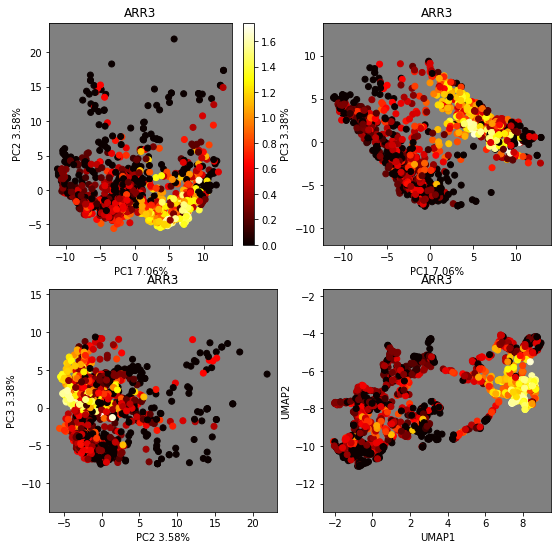

In [8]:
import matplotlib.pyplot as plt

#plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'grey'
#gene_name = 'TIMP1'
gene_name = 'OTP'
gene_name = 'ENO3'
gene_name = 'RCVRN'
gene_name = 'THY1'
gene_name = 'NEAT1'
gene_name = 'RCVRN'
gene_name = 'NRL'
gene_name = 'ROM1'
#gene_name = 'TFF1'
#gene_name = 'ARR3'
gene_name = 'NEAT1'
gene_name = 'RAX'
gene_name = 'RCVRN'
gene_name = 'NRL'
gene_name = 'TFF1'
gene_name = 'ARR3'

#u = -u
#u[:,1] = -u[:,1]
print(len(gene_names))

score = matrix[gene_names.index(gene_name),:]

plt.figure(figsize=(9,9))
plt.subplot(221)
plt.scatter(u[:,0],u[:,1],c=score,cmap='hot')
plt.axis('equal')
plt.colorbar()
plt.xlabel('PC1 {:.2f}%'.format(s[0]/np.sum(s)*100))
plt.ylabel('PC2 {:.2f}%'.format(s[1]/np.sum(s)*100))
plt.axis('equal')
plt.title(gene_name)
plt.subplot(222)
plt.scatter(u[:,0],u[:,2],c=score,cmap='hot')
plt.axis('equal')
plt.title(gene_name)
plt.xlabel('PC1 {:.2f}%'.format(s[0]/np.sum(s)*100))
plt.ylabel('PC3 {:.2f}%'.format(s[2]/np.sum(s)*100))
plt.subplot(223)
plt.scatter(u[:,1],u[:,2],c=score,cmap='hot')
plt.axis('equal')
plt.title(gene_name)
plt.xlabel('PC2 {:.2f}%'.format(s[1]/np.sum(s)*100))
plt.ylabel('PC3 {:.2f}%'.format(s[2]/np.sum(s)*100))


plt.subplot(224)
plt.scatter(umap_coords[:,0],-umap_coords[:,1],c=score,cmap='hot')
plt.axis('equal')
plt.title(gene_name)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')




Text(0.5, 1.0, 'TOTAL_COUNTS')

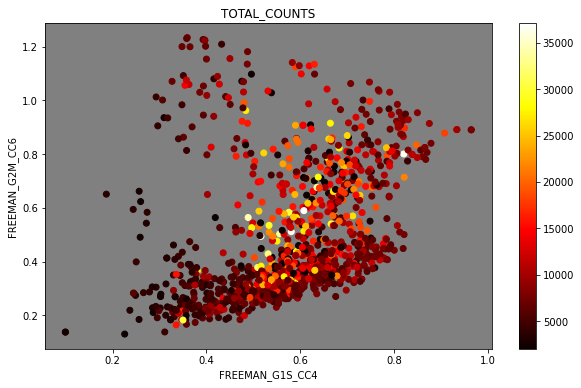

In [9]:
import matplotlib.pyplot as plt

#plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'grey'

#coord_name1 = 'IC1+'
#coord_name2 = 'IC2+'
coord_name1 = 'FREEMAN_G1S_CC4'
coord_name2 = 'FREEMAN_G2M_CC6'
#score_name = 'PID138045_HIF1alpha_transcription_factor_network'
#score_name = 'REACTOME1269960_Glycolysis'
#score_name = 'COL6A1_COL6A2_correlated'
#score_name = 'Lessnick_EWS-FLI_Up'
#score_name = 'GO0000398_mRNA_splicing_via_spliceosome'
#score_name = 'M13867_CDH1kd'
#score_name = 'CASPASES'
#score_name = 'GO0045333_cellular_respiration'
#score_name = 'ER_STRESS'
#score_name = 'EF1_DIRECT'
#score_name = 'ECM_HYPOXIA_ATTRACTOR'

#score_name = 'FREEMAN_G2M_CC6'
#score_name = 'FREEMAN_G1S_CC4'
score_name = 'TOTAL_COUNTS'
#score_name = 'Y79_IC4'
#score_name = 'IC14+'
# score_name = 'CADHERINS'
#score_name = 'GO_0001754_eye_photoreceptor_cell_differentiation'
#score_name = 'Y79_HETEROGENEITY'

#u = -u
#u[:,1] = -u[:,1]

x = df[coord_name1].to_numpy()
y = df[coord_name2].to_numpy()
score = df[score_name]

plt.figure(figsize=(10,6))
plt.subplot(111)
plt.scatter(x,y,c=score,cmap='hot')
#plt.axis('equal')
plt.colorbar()
plt.xlabel(coord_name1)
plt.ylabel(coord_name2)
plt.title(score_name)



The initial number of nodes must be at least 3. This will be fixed
Generating the initial configuration
Creating a circle in the plane induced by the 1st and 2nd PCs with 3 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
2 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  30  nodes on  1131  points and  2  dimensions
Nodes =  3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

0||30	0.0099	30	30	30	0	0	0	0.0059	0.0056	0.9252	0.929	0.0012	0.0028	0.0848	2.5444	0


MSDEnergyPlot not yet implemented
accuracyComplexityPlot not yet implemented
0.4062  seconds elapsed


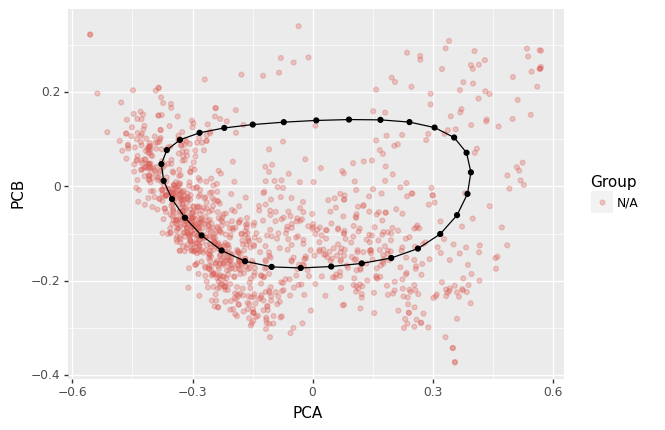

[<ggplot: (8752060566441)>]


In [24]:
import elpigraph

data = np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),axis=1)

egr2d = elpigraph.computeElasticPrincipalCircle(data,30,Mu=2)

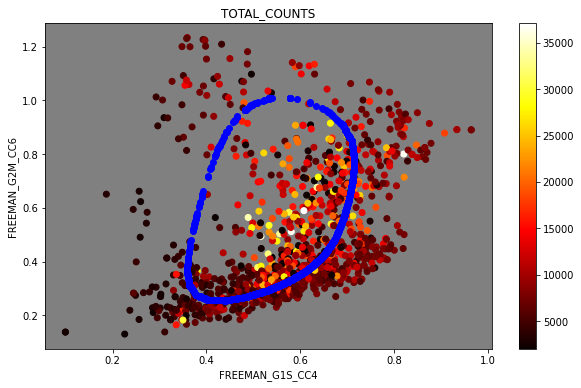

In [18]:
partition, dists = elpigraph.src.core.PartitionData(X = data, NodePositions = egr2d[0]['NodePositions'], MaxBlockSize = 100000000, TrimmingRadius = np.inf,SquaredX = np.sum(data**2,axis=1,keepdims=1))
ProjStruct = elpigraph.src.reporting.project_point_onto_graph(X = data,
                                     NodePositions = egr2d[0]['NodePositions'],
                                     Edges = egr2d[0]['Edges'][0],
                                     Partition = partition)
#display(ProjStruct)


plt.figure(figsize=(10,6))
plt.subplot(111)
plt.scatter(x,y,c=score,cmap='hot')
#plt.axis('equal')
plt.colorbar()
plt.xlabel(coord_name1)
plt.ylabel(coord_name2)
plt.title(score_name)

plt.plot(ProjStruct['X_projected'][:,0],ProjStruct['X_projected'][:,1],'bo')



Text(0, 0.5, 'RCVRN')

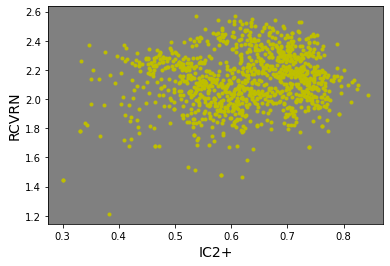

In [19]:
gene = 'NEAT1'
gene = 'RAX'
gene = 'RCVRN'
genev = matrix[gene_names.index(gene),:]
ic2 = df['Y79_IC2'].to_numpy()
ic9 = df['Y79_IC9-'].to_numpy()
ic4 = df['Y79_IC4'].to_numpy()
total_counts = df['TOTAL_COUNTS'].to_numpy()
plt.plot(ic2,genev,'y.')
#plt.plot(total_counts,ic4,'y.')
plt.xlabel('IC2+',fontsize=14)
plt.ylabel(gene,fontsize=14)

In [ ]:
import sys
print(sys.path)
sys.path.append('/home/zinovyev/anaconda3/lib/python3.7/site-packages')
print(sys.path)

The initial number of nodes must be at least 3. This will be fixed
Generating the initial configuration
Creating a circle in the plane induced by the 1st and 2nd PCs with 3 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
3 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  30  nodes on  1131  points and  3  dimensions
Nodes =  3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

0||30	0.0107	30	30	30	0	0	0	0.0082	0.0077	0.9335	0.9377	0.0002	0.0023	0.0691	2.0719	0


MSDEnergyPlot not yet implemented
accuracyComplexityPlot not yet implemented
0.4095  seconds elapsed


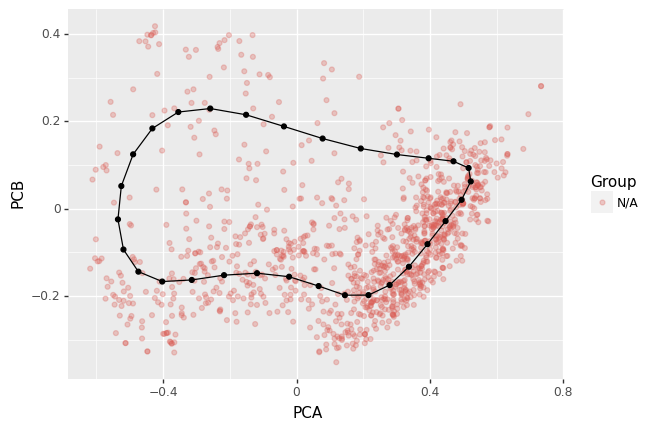

[<ggplot: (8752060509733)>]


In [133]:
# quantification of cyclic pseudo-time from ICAs associated to the cell cycle
import elpigraph

ica_metasamples = folder+'Y79/Y79_nufp10k_ica_A.xls'
ica_df = pd.read_csv(ica_metasamples,delimiter='\t')

# cell_cycle_ics_data = ica_df[['IC1','IC7','IC10']].to_numpy()
cell_cycle_ics_data = df[['D085T8_IC1','D085T8_IC2','D085T8_IC3']].to_numpy()
egr = elpigraph.computeElasticPrincipalCircle(cell_cycle_ics_data,30,Mu=0.5,Lambda=0.001)

Text(0.5, 1.0, 'TOTAL_COUNTS')

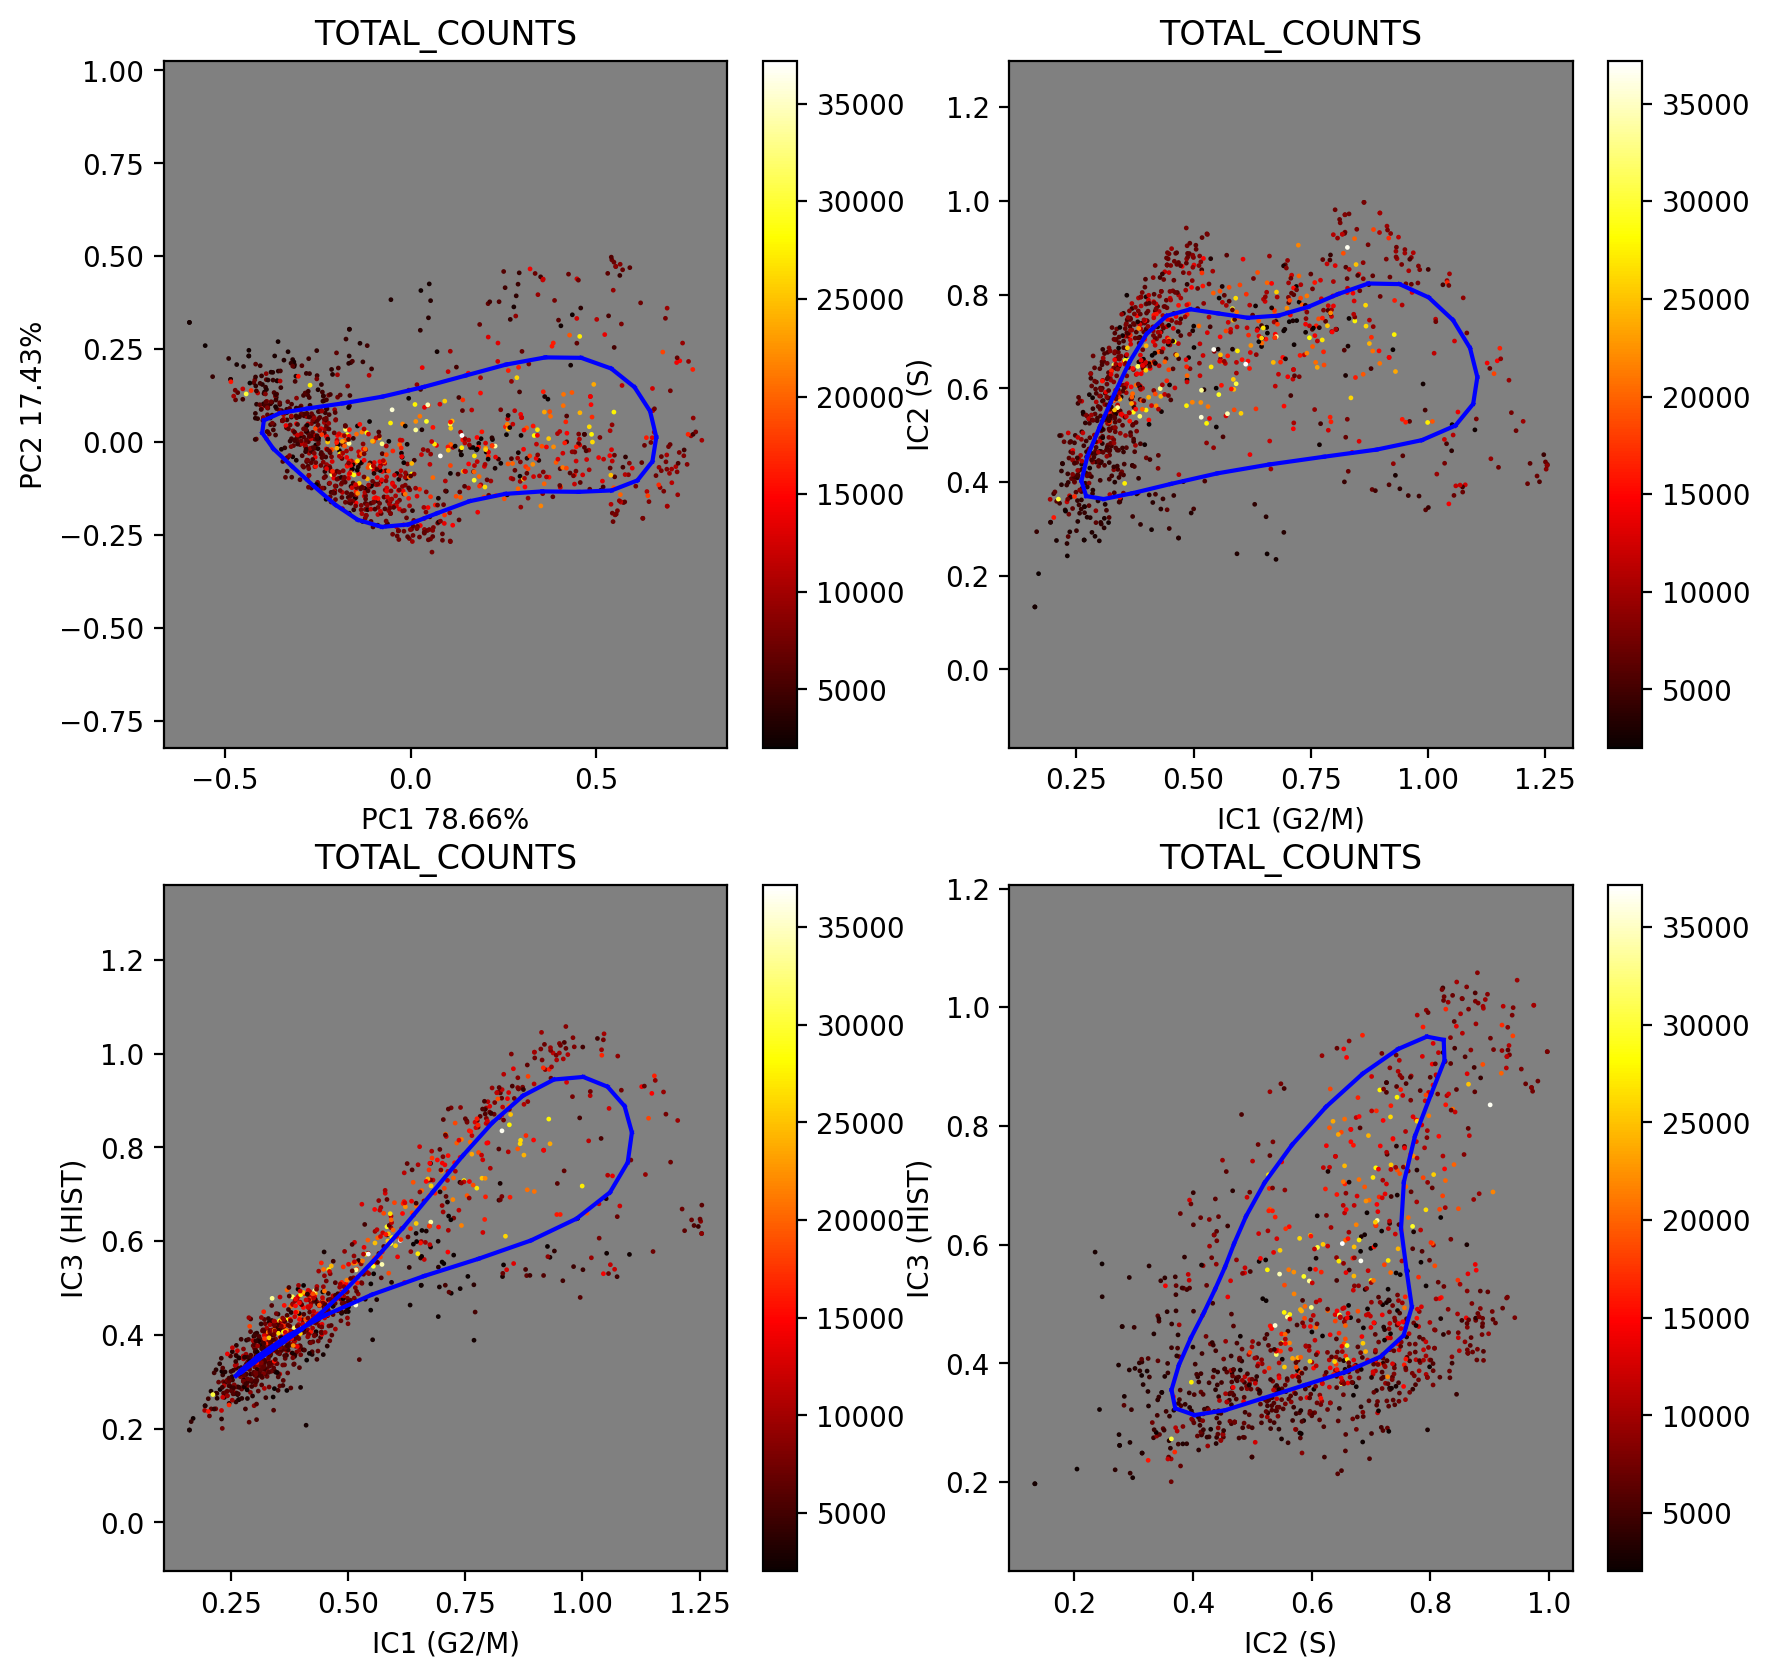

In [172]:
pca = PCA()
mean_vector = np.mean(cell_cycle_ics_data)
u = pca.fit_transform(cell_cycle_ics_data)
v = pca.components_.T
s = pca.explained_variance_

nodep = egr[0]['NodePositions']
edges = egr[0]['Edges'][0]
nodep_pca = np.matmul(nodep-mean_vector,v)
#mean_vector = 

score_name = 'TOTAL_COUNTS'
#score_name = 'Y79_IC10'
#score_name = 'Y79_IC7'
#score_name = 'Y79_IC10'
score = df[score_name]
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.scatter(u[:,0],u[:,1],c=score,s=0.5,cmap='hot')
for e in edges:
    plt.plot([nodep_pca[e[0],0],nodep_pca[e[1],0]],[nodep_pca[e[0],1],nodep_pca[e[1],1]],'b-')
plt.axis('equal')
plt.colorbar()
plt.xlabel('PC1 {:.2f}%'.format(s[0]/np.sum(s)*100))
plt.ylabel('PC2 {:.2f}%'.format(s[1]/np.sum(s)*100))
plt.axis('equal')
plt.title(score_name)
plt.subplot(222)
plt.scatter(cell_cycle_ics_data[:,0],cell_cycle_ics_data[:,1],c=score,s=0.5,cmap='hot')
for e in edges:
    plt.plot([nodep[e[0],0],nodep[e[1],0]],
             [nodep[e[0],1],nodep[e[1],1]],'b-')
plt.axis('equal')
plt.colorbar()
plt.xlabel('IC1 (G2/M)')
plt.ylabel('IC2 (S)')
plt.axis('equal')
plt.title(score_name)
plt.subplot(223)
plt.scatter(cell_cycle_ics_data[:,0],cell_cycle_ics_data[:,2],c=score,s=0.5,cmap='hot')
for e in edges:
    plt.plot([nodep[e[0],0],nodep[e[1],0]],
             [nodep[e[0],2],nodep[e[1],2]],'b-')
plt.axis('equal')
plt.colorbar()
plt.xlabel('IC1 (G2/M)')
plt.ylabel('IC3 (HIST)')
plt.axis('equal')
plt.title(score_name)
plt.subplot(224)
plt.scatter(cell_cycle_ics_data[:,1],cell_cycle_ics_data[:,2],c=score,s=0.5,cmap='hot')
for e in edges:
    plt.plot([nodep[e[0],1],nodep[e[1],1]],
             [nodep[e[0],2],nodep[e[1],2]],'b-')
plt.axis('equal')
plt.colorbar()
plt.xlabel('IC2 (S)')
plt.ylabel('IC3 (HIST)')
plt.axis('equal')
plt.title(score_name)



Suggested edge to remove 6
Selected edge to remove 19
30
[[ 4  6]
 [ 3  7]
 [ 5  7]
 [ 6  8]
 [ 1 11]
 [ 2 12]
 [10 12]
 [ 5 13]
 [10 14]
 [ 0 15]
 [11 15]
 [ 1 16]
 [ 9 17]
 [14 17]
 [ 4 18]
 [ 9 19]
 [ 2 20]
 [16 21]
 [19 23]
 [23 24]
 [ 0 25]
 [22 25]
 [ 3 26]
 [24 26]
 [ 8 27]
 [20 27]
 [13 28]
 [21 28]
 [18 29]
 [22 29]]


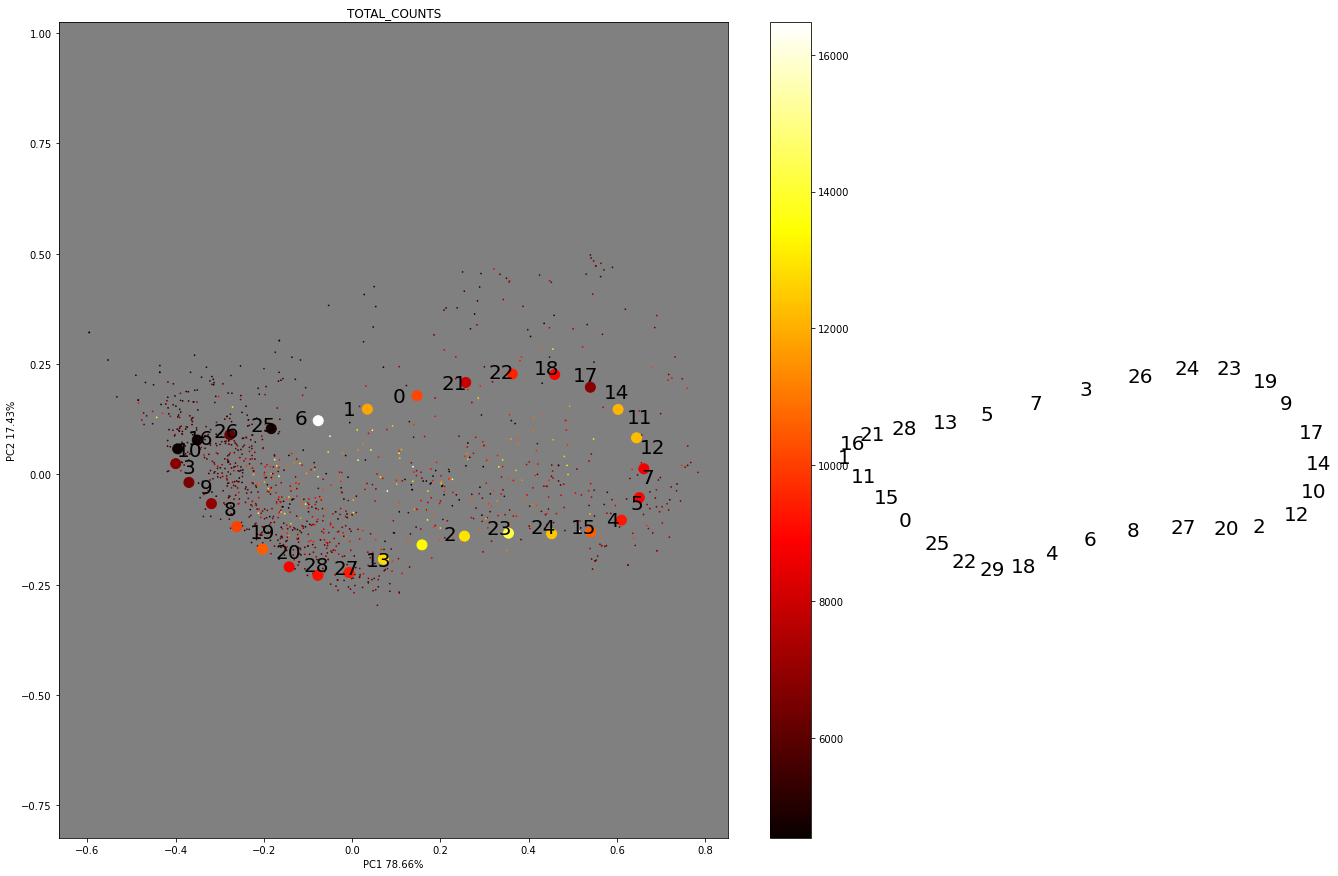

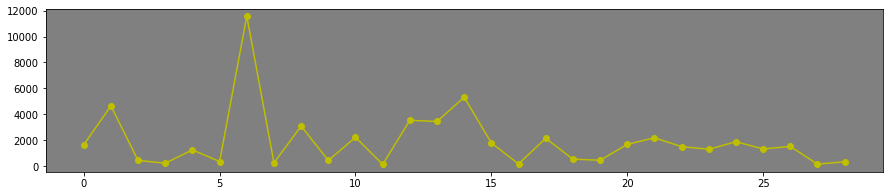

In [153]:
partition, dists = elpigraph.src.core.PartitionData(X = cell_cycle_ics_data, NodePositions = egr[0]['NodePositions'], MaxBlockSize = 100000000, TrimmingRadius = np.inf,SquaredX = np.sum(cell_cycle_ics_data**2,axis=1,keepdims=1))
ProjStruct = elpigraph.src.reporting.project_point_onto_graph(X = cell_cycle_ics_data,
                                     NodePositions = egr[0]['NodePositions'],
                                     Edges = egr[0]['Edges'][0],
                                     Partition = partition)

total_counts = df['TOTAL_COUNTS'].to_numpy()
node_read_counts = np.zeros(nodep.shape[0])
edge_abs_diff_counts = np.zeros(len(edges))
for i in range(len(nodep)):
    node_read_counts[i] = np.mean(total_counts[np.where(partition==i)[0]])
for i,e in enumerate(edges):
    edge_abs_diff_counts[i] = np.abs(node_read_counts[e[0]]-node_read_counts[e[1]])

plt.figure(figsize=(15,15))
plt.scatter(u[:,0],u[:,1],c=score,s=0.5,cmap='hot')
plt.scatter(nodep_pca[:,0],nodep_pca[:,1],c=node_read_counts,s=100,cmap='hot')
for i in range(len(nodep)):
    plt.text(nodep_pca[i,0]+1.5,nodep_pca[i,1],str(i),fontsize=20)
for i,e in enumerate(edges):
    mn_posx = np.mean(nodep_pca[e,0])
    mn_posy = np.mean(nodep_pca[e,1])
    plt.text(mn_posx,mn_posy,str(i),fontsize=20)

plt.axis('equal')
plt.colorbar()
plt.xlabel('PC1 {:.2f}%'.format(s[0]/np.sum(s)*100))
plt.ylabel('PC2 {:.2f}%'.format(s[1]/np.sum(s)*100))
plt.axis('equal')
plt.title(score_name)
    
plt.figure(figsize=(15,3))
plt.plot(edge_abs_diff_counts,'yo-')

print('Suggested edge to remove',np.argmax(edge_abs_diff_counts))
edge_to_remove = 19
print('Selected edge to remove',edge_to_remove)
print(len(egr[0]['Edges'][0]))
print(egr[0]['Edges'][0])

24
29
[[24, 26, 3, 7, 5, 13, 28, 21, 16, 1, 11, 15, 0, 25, 22, 29, 18, 4, 6, 8, 27, 20, 2, 12, 10, 14, 17, 9, 19, 23], [24]]
[24, 26, 3, 7, 5, 13, 28, 21, 16, 1, 11, 15, 0, 25, 22, 29, 18, 4, 6, 8, 27, 20, 2, 12, 10, 14, 17, 9, 19, 23]


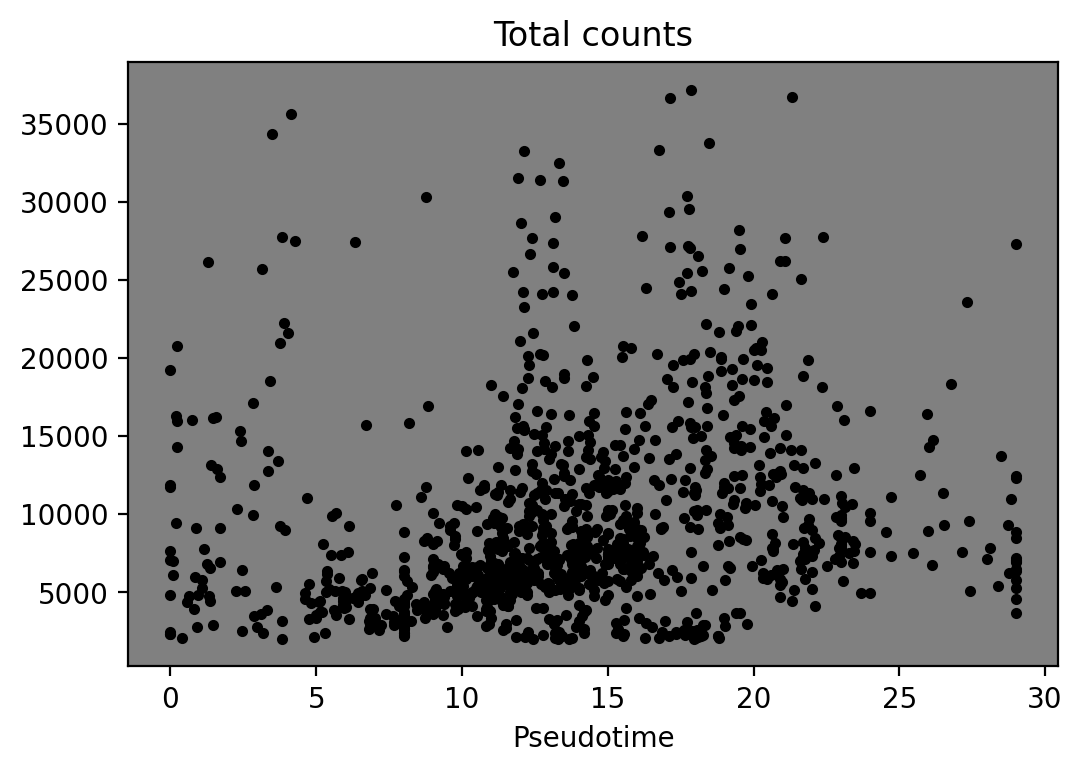

In [159]:
from elpigraph_ps_tools import *

gr = egr[0].copy()
edges = gr['Edges'][0]
starting_node = edges[edge_to_remove,1]
print(starting_node)
edges = np.delete(gr['Edges'][0],edge_to_remove,axis=0)
w1 = np.delete(gr['Edges'][1],edge_to_remove,axis=0)
w2 = np.delete(gr['Edges'][2],edge_to_remove,axis=0)
gr['Edges'] = (edges,w1,w2)
print(len(gr['Edges'][0]))

print(extract_trajectories(gr,starting_node,verbose=False))
traj = extract_trajectories(gr,starting_node,verbose=False)[0]
print(traj)

ProjStruct = project_on_tree(cell_cycle_ics_data,gr)
#pseudo_time_trajectory(traj,ProjStruct)
PseudoTimeTraj = quantify_pseudotime([traj],ProjStruct,producePlot=False)
points = PseudoTimeTraj[0]['Points'] 
pst = PseudoTimeTraj[0]['Pseudotime']

plt.plot(pst,total_counts[points],'k.')
plt.xlabel('Pseudotime')
plt.title('Total counts')
plt.show()

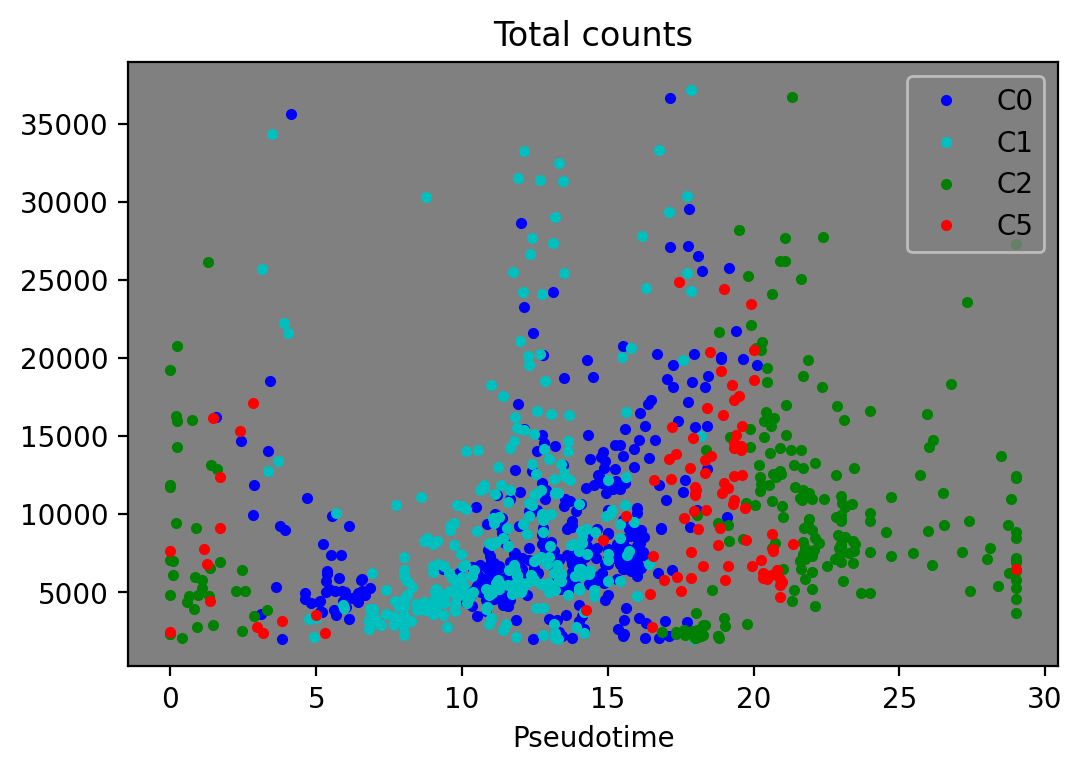

In [171]:
#plt.plot(pst,total_counts[points],'ko')
#plt.xlabel('Pseudotime')
#plt.title('Total counts')
#plt.show()

filter1=np.where(np.isin(points,indsC0))
filter2=np.where(np.isin(points,indsC1))
filter3=np.where(np.isin(points,indsC2))
filter4=np.where(np.isin(points,indsC5))

plt.plot(pst[filter1],total_counts[points[filter1]],'b.')
plt.plot(pst[filter2],total_counts[points[filter2]],'c.')
plt.plot(pst[filter3],total_counts[points[filter3]],'g.')
plt.plot(pst[filter4],total_counts[points[filter4]],'r.')
plt.legend(['C0','C1','C2','C5'])
#plt.plot(pst[indsC1],total_counts[indsC1],'c.')
#plt.plot(pst[indsC2],total_counts[indsC2],'g.')
#plt.plot(pst[indsC5],total_counts[indsC5],'r.')
plt.xlabel('Pseudotime')
plt.title('Total counts')
plt.show()

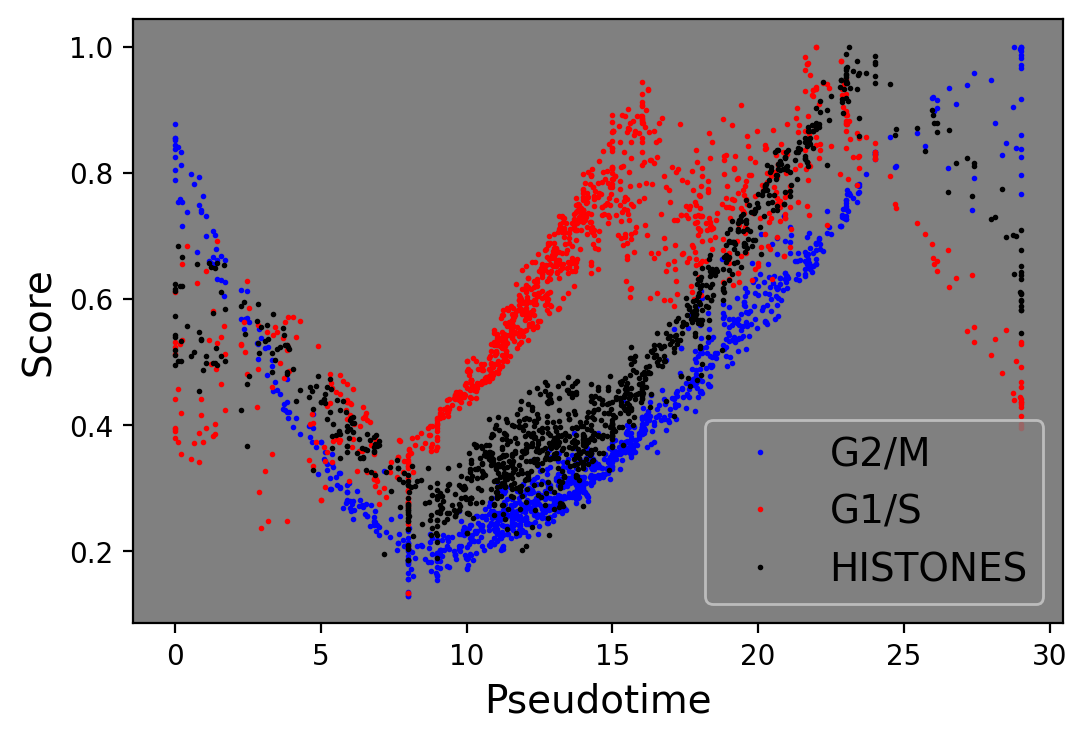

In [173]:
sc_IC1 = cell_cycle_ics_data[points,0]
sc_IC2 = cell_cycle_ics_data[points,1]
sc_IC3 = cell_cycle_ics_data[points,2]
plt.plot(pst,sc_IC1/np.max(sc_IC1),'b.',markersize=2)
plt.plot(pst,sc_IC2/np.max(sc_IC2),'r.',markersize=2)
plt.plot(pst,sc_IC3/np.max(sc_IC3),'k.',markersize=2)
plt.legend(['G2/M','G1/S','HISTONES'],fontsize=14)
plt.xlabel('Pseudotime',fontsize=14)
plt.ylabel('Score',fontsize=14)

plt.show()

Text(0, 0.5, 'Number of cells')

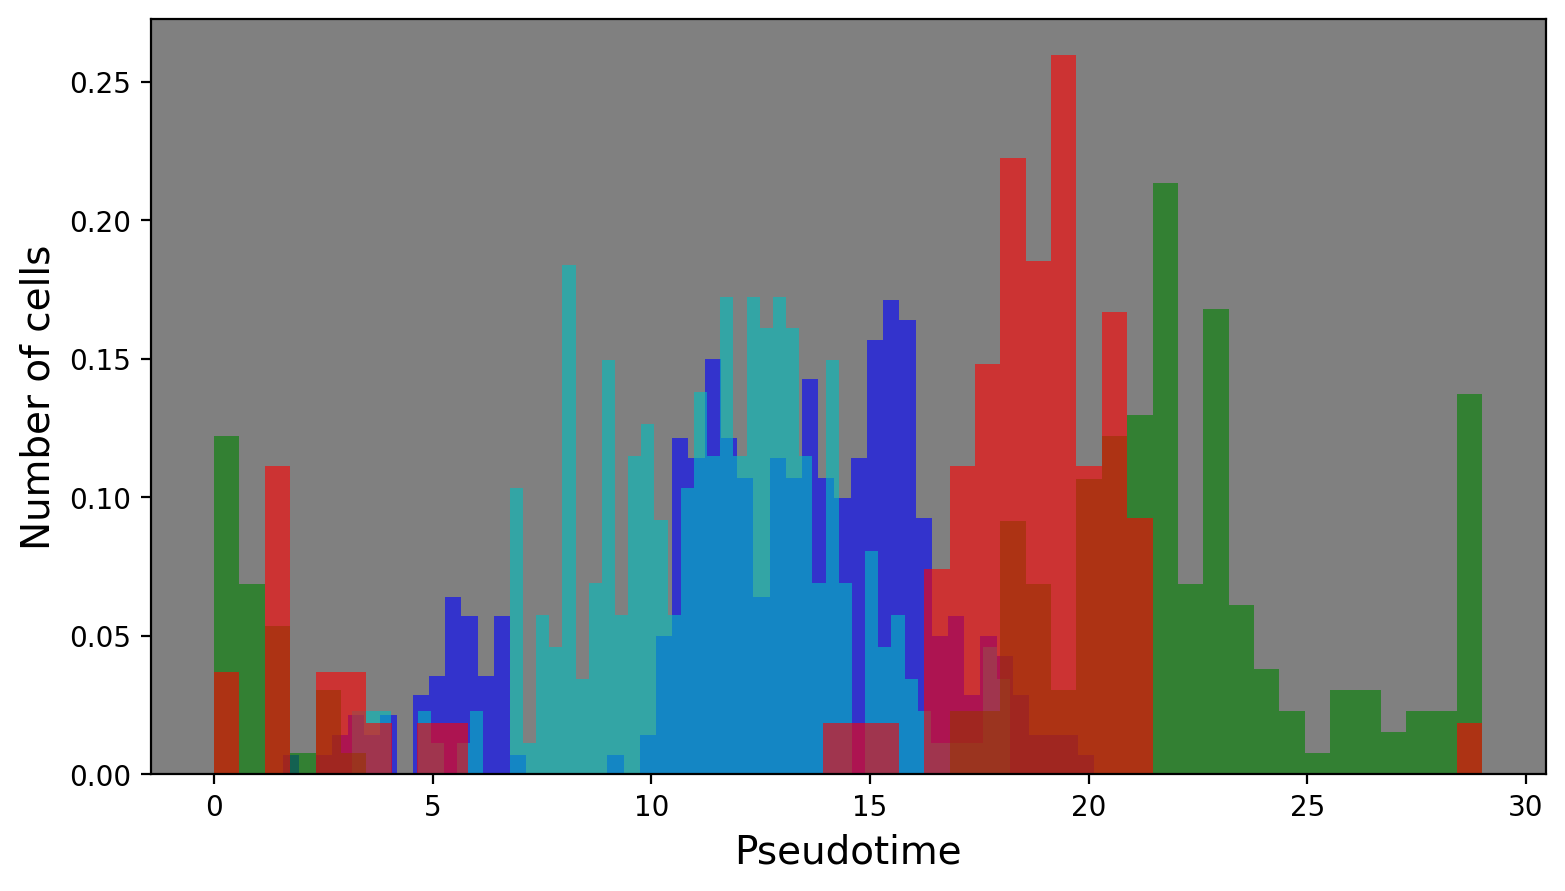

In [174]:
plt.figure(figsize=(9,5))
filter1=np.where(np.isin(points,indsC0))
filter2=np.where(np.isin(points,indsC1))
filter3=np.where(np.isin(points,indsC2))
filter4=np.where(np.isin(points,indsC5))

plt.hist(pst[filter1],bins=50,color='b',alpha = 0.6,density=True)
plt.hist(pst[filter2],bins=50,color='c',alpha = 0.6,density=True)
plt.hist(pst[filter3],bins=50,color='g',alpha = 0.6,density=True)
plt.hist(pst[filter4],bins=50,color='r',alpha = 0.6,density=True)
plt.xlabel('Pseudotime',fontsize=14)
plt.ylabel('Number of cells',fontsize=14)

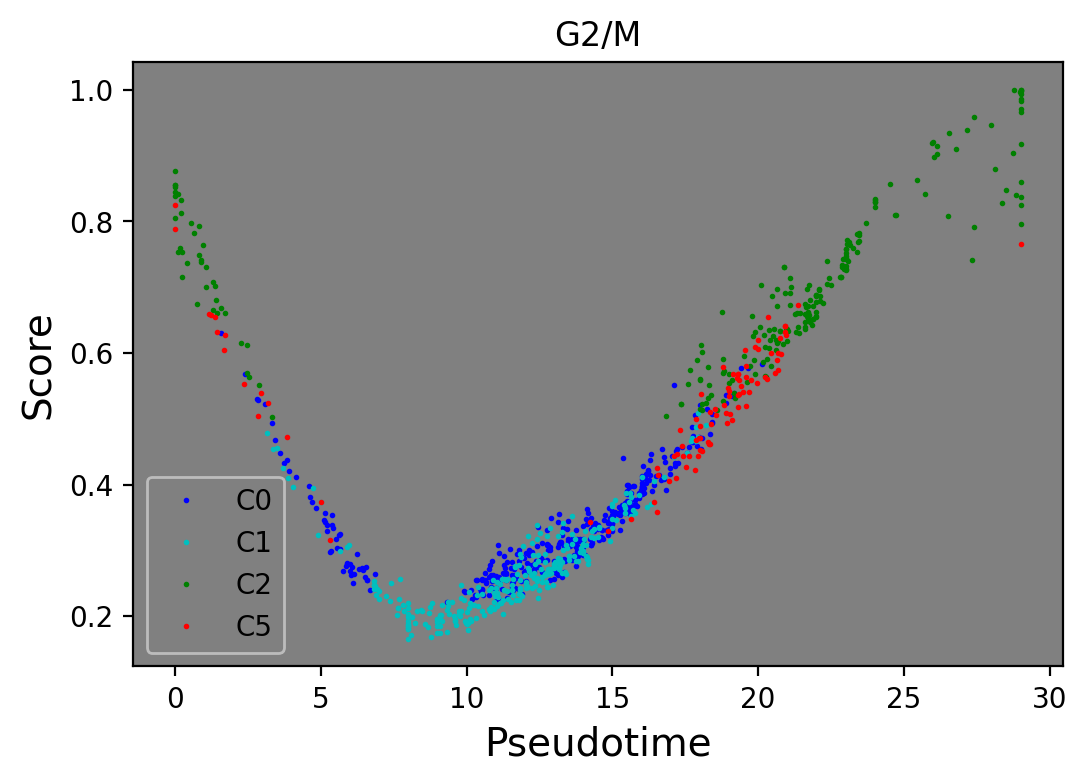

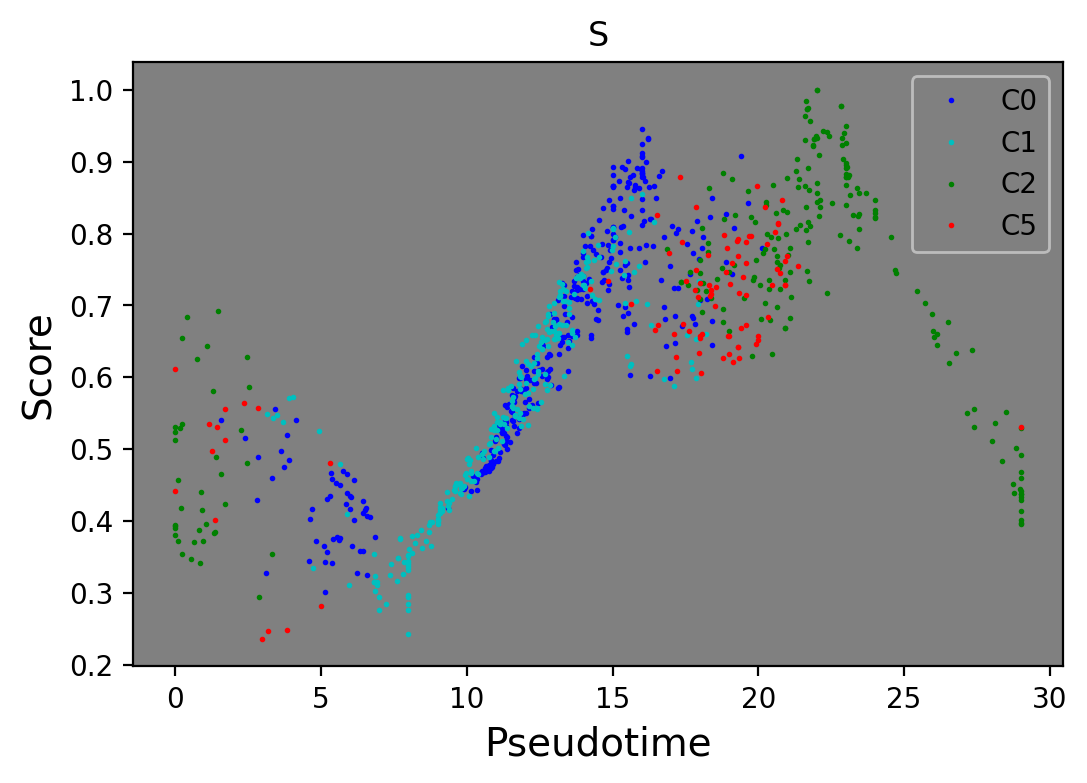

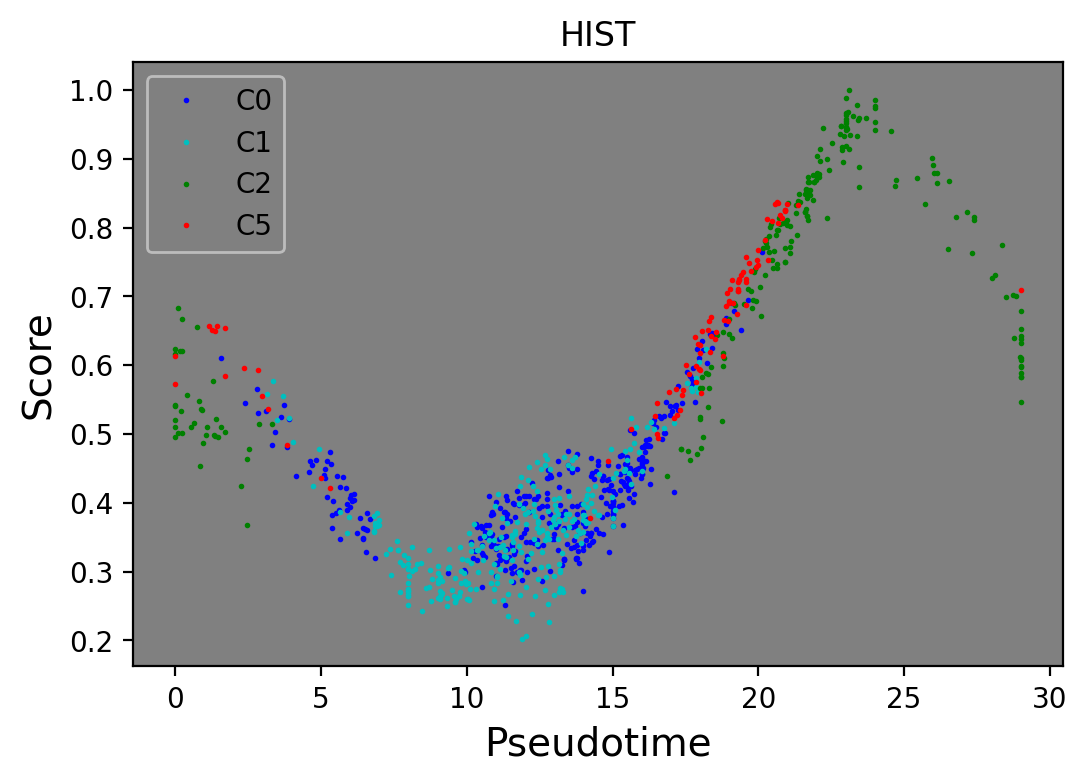

In [183]:
sc_IC = cell_cycle_ics_data[:,0]/np.max(cell_cycle_ics_data[:,0])
plt.plot(pst[filter1],sc_IC[points[filter1]],'b.',markersize=2)
plt.plot(pst[filter2],sc_IC[points[filter2]],'c.',markersize=2)
plt.plot(pst[filter3],sc_IC[points[filter3]],'g.',markersize=2)
plt.plot(pst[filter4],sc_IC[points[filter4]],'r.',markersize=2)
plt.title('G2/M')
plt.xlabel('Pseudotime',fontsize=14)
plt.ylabel('Score',fontsize=14)
plt.legend(['C0','C1','C2','C5'])
plt.show()

sc_IC = cell_cycle_ics_data[:,1]/np.max(cell_cycle_ics_data[:,1])
plt.plot(pst[filter1],sc_IC[points[filter1]],'b.',markersize=2)
plt.plot(pst[filter2],sc_IC[points[filter2]],'c.',markersize=2)
plt.plot(pst[filter3],sc_IC[points[filter3]],'g.',markersize=2)
plt.plot(pst[filter4],sc_IC[points[filter4]],'r.',markersize=2)
plt.title('S')
plt.xlabel('Pseudotime',fontsize=14)
plt.ylabel('Score',fontsize=14)
plt.legend(['C0','C1','C2','C5'])
plt.show()



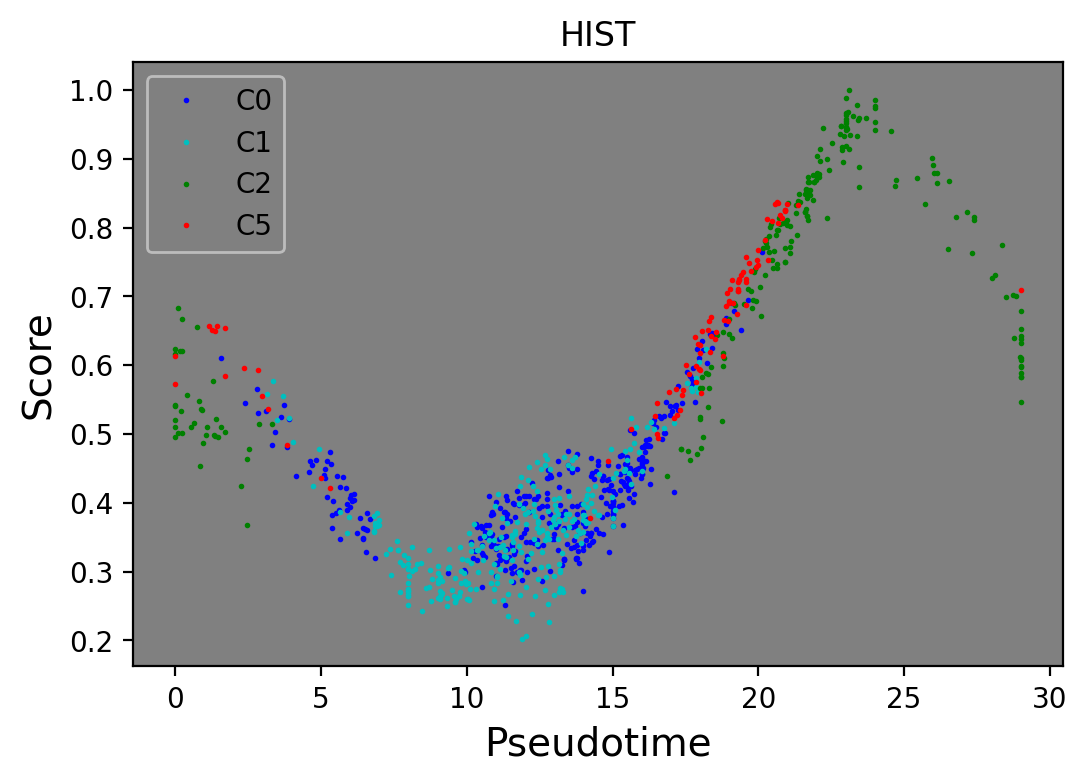

In [184]:
sc_IC = cell_cycle_ics_data[:,2]/np.max(cell_cycle_ics_data[:,2])
plt.plot(pst[filter1],sc_IC[points[filter1]],'b.',markersize=2)
plt.plot(pst[filter2],sc_IC[points[filter2]],'c.',markersize=2)
plt.plot(pst[filter3],sc_IC[points[filter3]],'g.',markersize=2)
plt.plot(pst[filter4],sc_IC[points[filter4]],'r.',markersize=2)
plt.title('HIST')
plt.xlabel('Pseudotime',fontsize=14)
plt.ylabel('Score',fontsize=14)
plt.legend(['C0','C1','C2','C5'])
plt.show()

In [197]:
count_file = '/mnt/c/Datas/SingleCellTranscriptomics/Retinoblastoma/RBSC11/count.txt'
count_df = pd.read_csv(count_file,delimiter='\t')
X = count_df.to_numpy()[:,1:]
display(X)
print(X.shape)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

(18274, 1135)


In [216]:
cells_count = count_df.columns[1:]
inds_count = np.argwhere(np.isin(cells_count,cells_all))
print(len(inds_count))

1131


In [199]:
# CytoTRACE analysis 

import time
from scipy.stats import gaussian_kde

%load_ext rpy2.ipython
%R source('/mnt/c/Libraries/CytoTRACE/R/CytoTRACE.R')

input_cyto=pd.DataFrame(X)
#display(input_cyto)

s=time.time()
%R -i input_cyto
print('Loaded in ',round(time.time()-s,2),'sec')

cytotrace = %R cytotrace <- CytoTRACE(input_cyto)
cytotrace_score = np.array(cytotrace.rx2('CytoTRACE'))
cytotrace_genes = np.array(cytotrace.rx2('cytoGenes'))

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


R[write to console]: The number of cells in your dataset is less than 3,000. Fast mode has been disabled.



Loaded in  41.89 sec


R[write to console]: CytoTRACE will be run on 1 sub-sample(s) of approximately 1135 cells each using 1 / 1 core(s)

R[write to console]: Pre-processing data and generating similarity matrix...

R[write to console]: Calculating gene counts signature...

R[write to console]: Smoothing values with NNLS regression and diffusion...

R[write to console]: Calculating genes associated with CytoTRACE...

R[write to console]: Done



Text(0, 0.5, 'UMAP2')

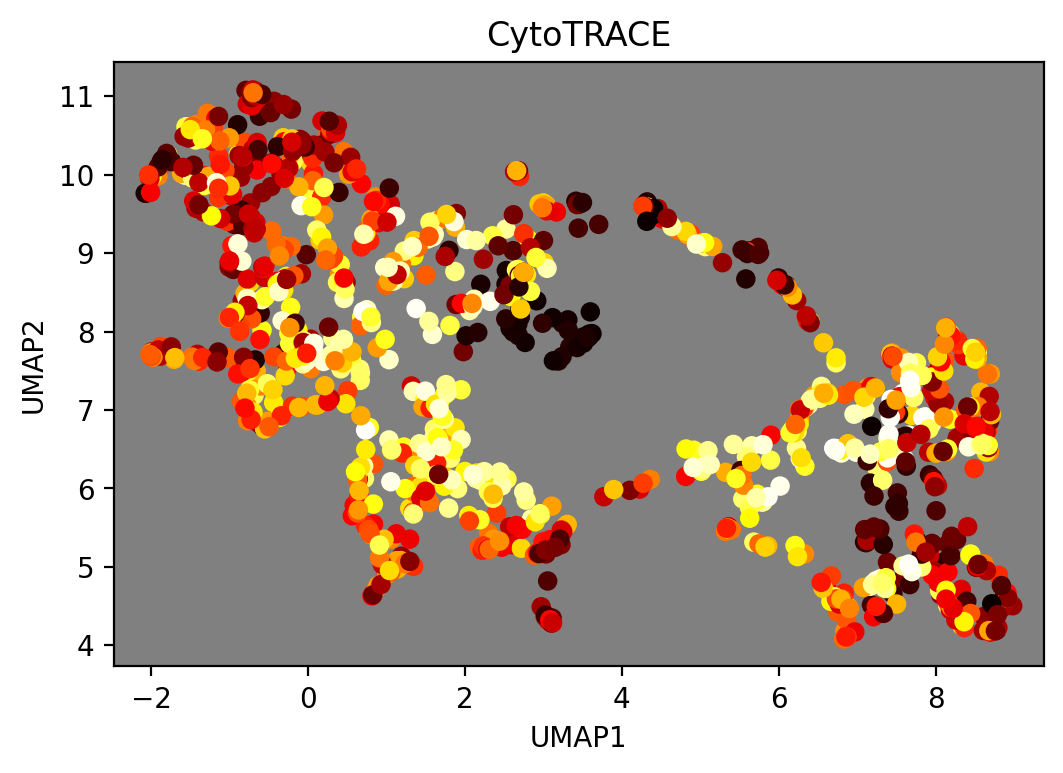

In [217]:
plt.scatter(umap_coords[:,0],umap_coords[:,1],c=np.array(cytotrace_score)[inds_count],cmap='hot')
plt.axis('equal')
plt.title('CytoTRACE')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

Text(0, 0.5, 'UMAP2')

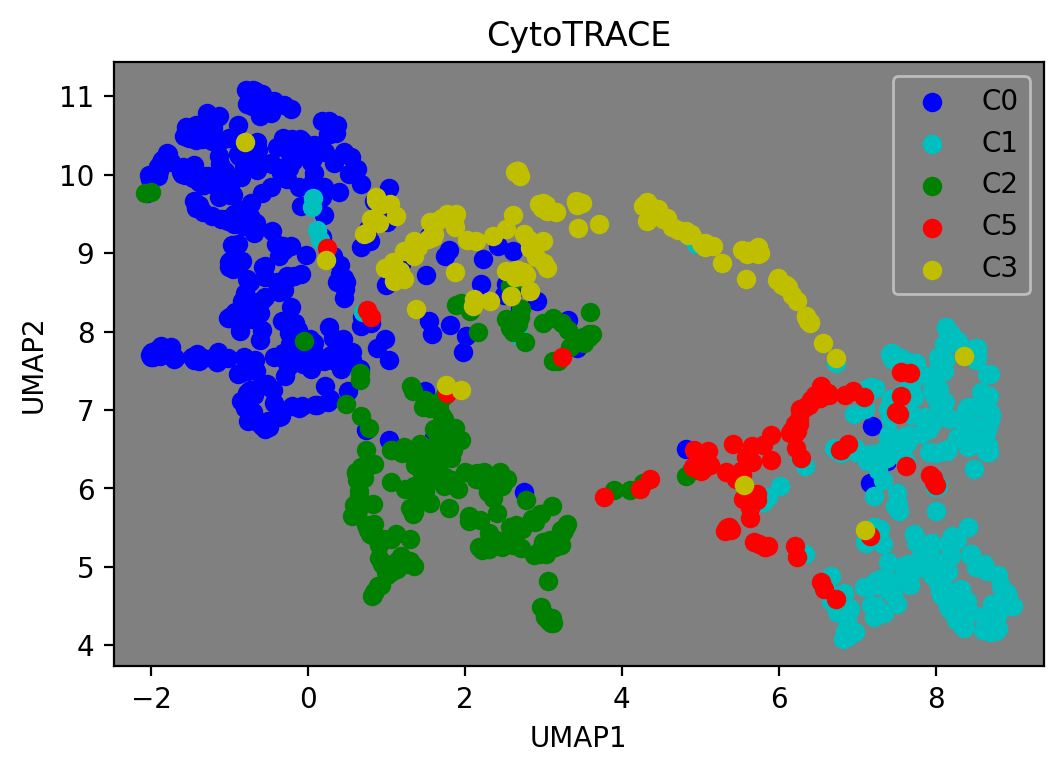

In [224]:
plt.scatter(umap_coords[indsC0,0],umap_coords[indsC0,1],c='b',cmap='hot')
plt.scatter(umap_coords[indsC1,0],umap_coords[indsC1,1],c='c',cmap='hot')
plt.scatter(umap_coords[indsC2,0],umap_coords[indsC2,1],c='g',cmap='hot')
plt.scatter(umap_coords[indsC5,0],umap_coords[indsC5,1],c='r',cmap='hot')
plt.scatter(umap_coords[indsC3,0],umap_coords[indsC3,1],c='y',cmap='hot')
plt.legend(['C0','C1','C2','C5','C3'])
plt.axis('equal')
plt.title('CytoTRACE')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

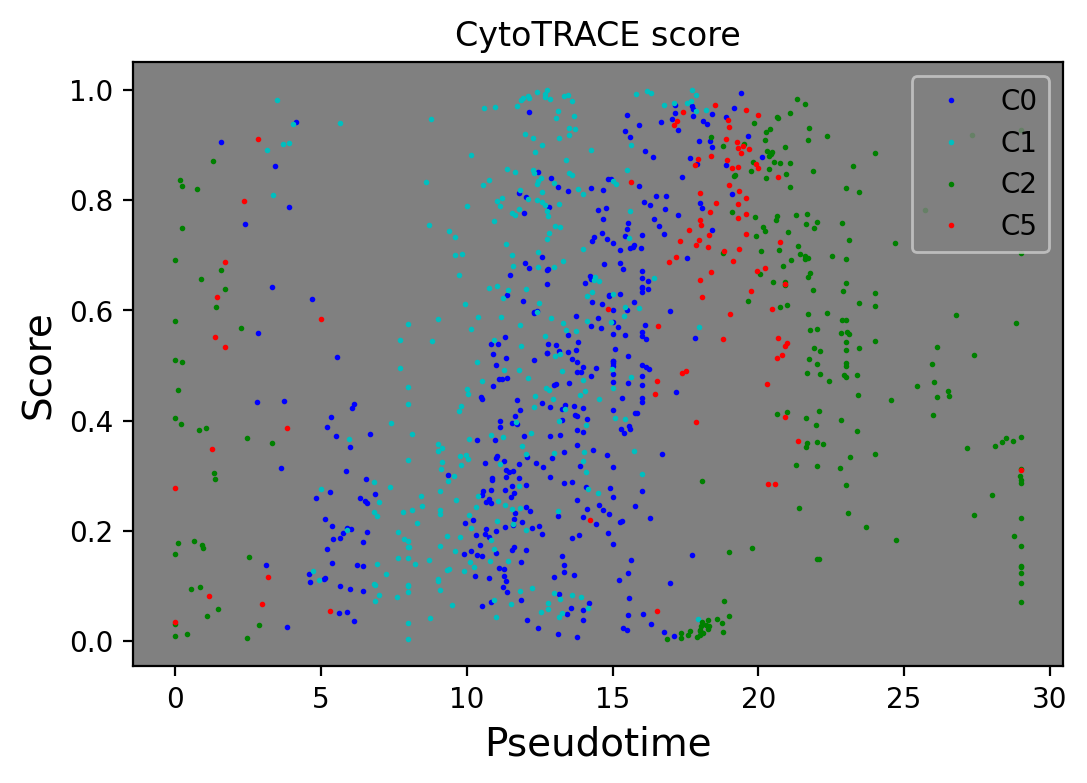

In [226]:
cytotrace_score_aligned = cytotrace_score[inds_count]

sc_IC = cytotrace_score_aligned
plt.plot(pst[filter1],sc_IC[points[filter1]],'b.',markersize=2)
plt.plot(pst[filter2],sc_IC[points[filter2]],'c.',markersize=2)
plt.plot(pst[filter3],sc_IC[points[filter3]],'g.',markersize=2)
plt.plot(pst[filter4],sc_IC[points[filter4]],'r.',markersize=2)
plt.title('CytoTRACE score')
plt.xlabel('Pseudotime',fontsize=14)
plt.ylabel('Score',fontsize=14)
plt.legend(['C0','C1','C2','C5'])
plt.show()

(1131, 50)


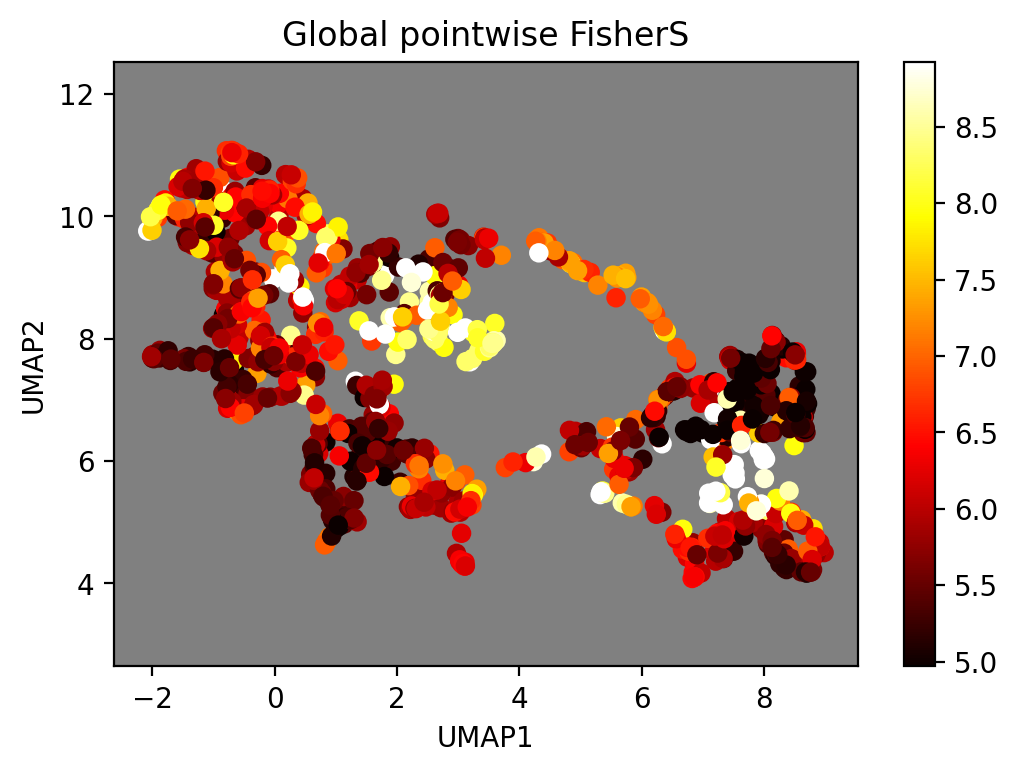

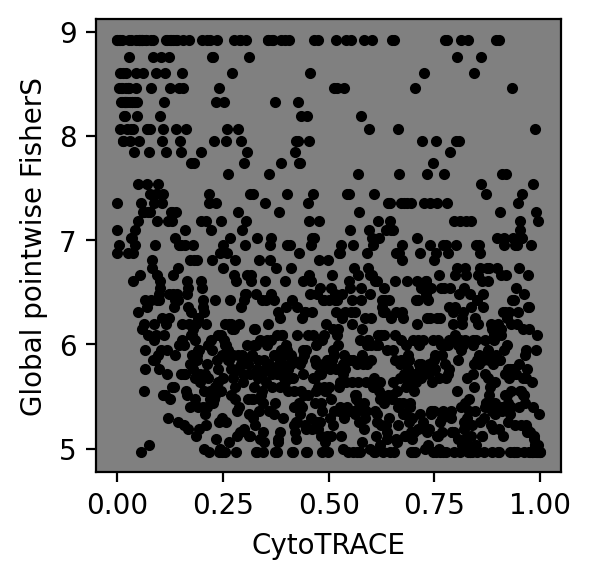

In [264]:
# global pointwise Fisher separability

print(X_pca.shape)

glob_pw = skdim.lid.FisherS(conditional_number=10).fit(X_pca).point_inseparability_to_pointID()[0]
glob_pw = winsorize(glob_pw, limits=(0.05,0.05), inclusive=(True, True), inplace=True)

plt.scatter(umap_coords[:,0],umap_coords[:,1],c=np.array(glob_pw),cmap='hot')
plt.colorbar()
plt.axis('equal')
plt.title('Global pointwise FisherS')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

plt.figure(figsize=(3,3))
plt.plot(cytotrace_score_aligned,glob_pw,'k.')
plt.xlabel('CytoTRACE')
plt.ylabel('Global pointwise FisherS')
plt.show()

In [252]:
n_neighbors = 100
id_results={}

X = X_pca

s=time.time()
danco_caldata = skdim.gid.DANCo(D=50).fit(np.random.random((n_neighbors,50))).calibration_data_
id_results['DANCo'] = skdim.asPointwise(X,skdim.gid.DANCo(D=50,calibration_data=danco_caldata), n_neighbors=n_neighbors)
print('DANCo',round(time.time()-s,2),'sec')
s=time.time()
id_results['ESS'] = skdim.asPointwise(X,skdim.lid.ESS(),n_neighbors=n_neighbors)
print('ESS',round(time.time()-s,2))
s=time.time()
id_results['FisherS'] = skdim.asPointwise(X,skdim.lid.FisherS(),n_neighbors=n_neighbors)
print('FisherS',round(time.time()-s,2))
s=time.time()
id_results['TwoNN'] = skdim.asPointwise(X,skdim.gid.TwoNN(),n_neighbors=n_neighbors)
print('TwoNN',round(time.time()-s,2))
s=time.time()
id_results['alphaFO_0.1_PCA'] = skdim.asPointwise(X,skdim.lid.lPCA(alphaFO=.1),n_neighbors=n_neighbors)
print('alphaFO_0.1_PCA',round(time.time()-s,2))
s=time.time()
id_results['alphaFO_0.05_PCA'] = skdim.asPointwise(X,skdim.lid.lPCA(alphaFO=.05),n_neighbors=n_neighbors)
print('alphaFO_0.05_PCA',round(time.time()-s,2))


DANCo 25.99 sec
ESS 101.24
FisherS 3.46
TwoNN 1.1
alphaFO_0.1_PCA 2.56
alphaFO_0.05_PCA 2.7


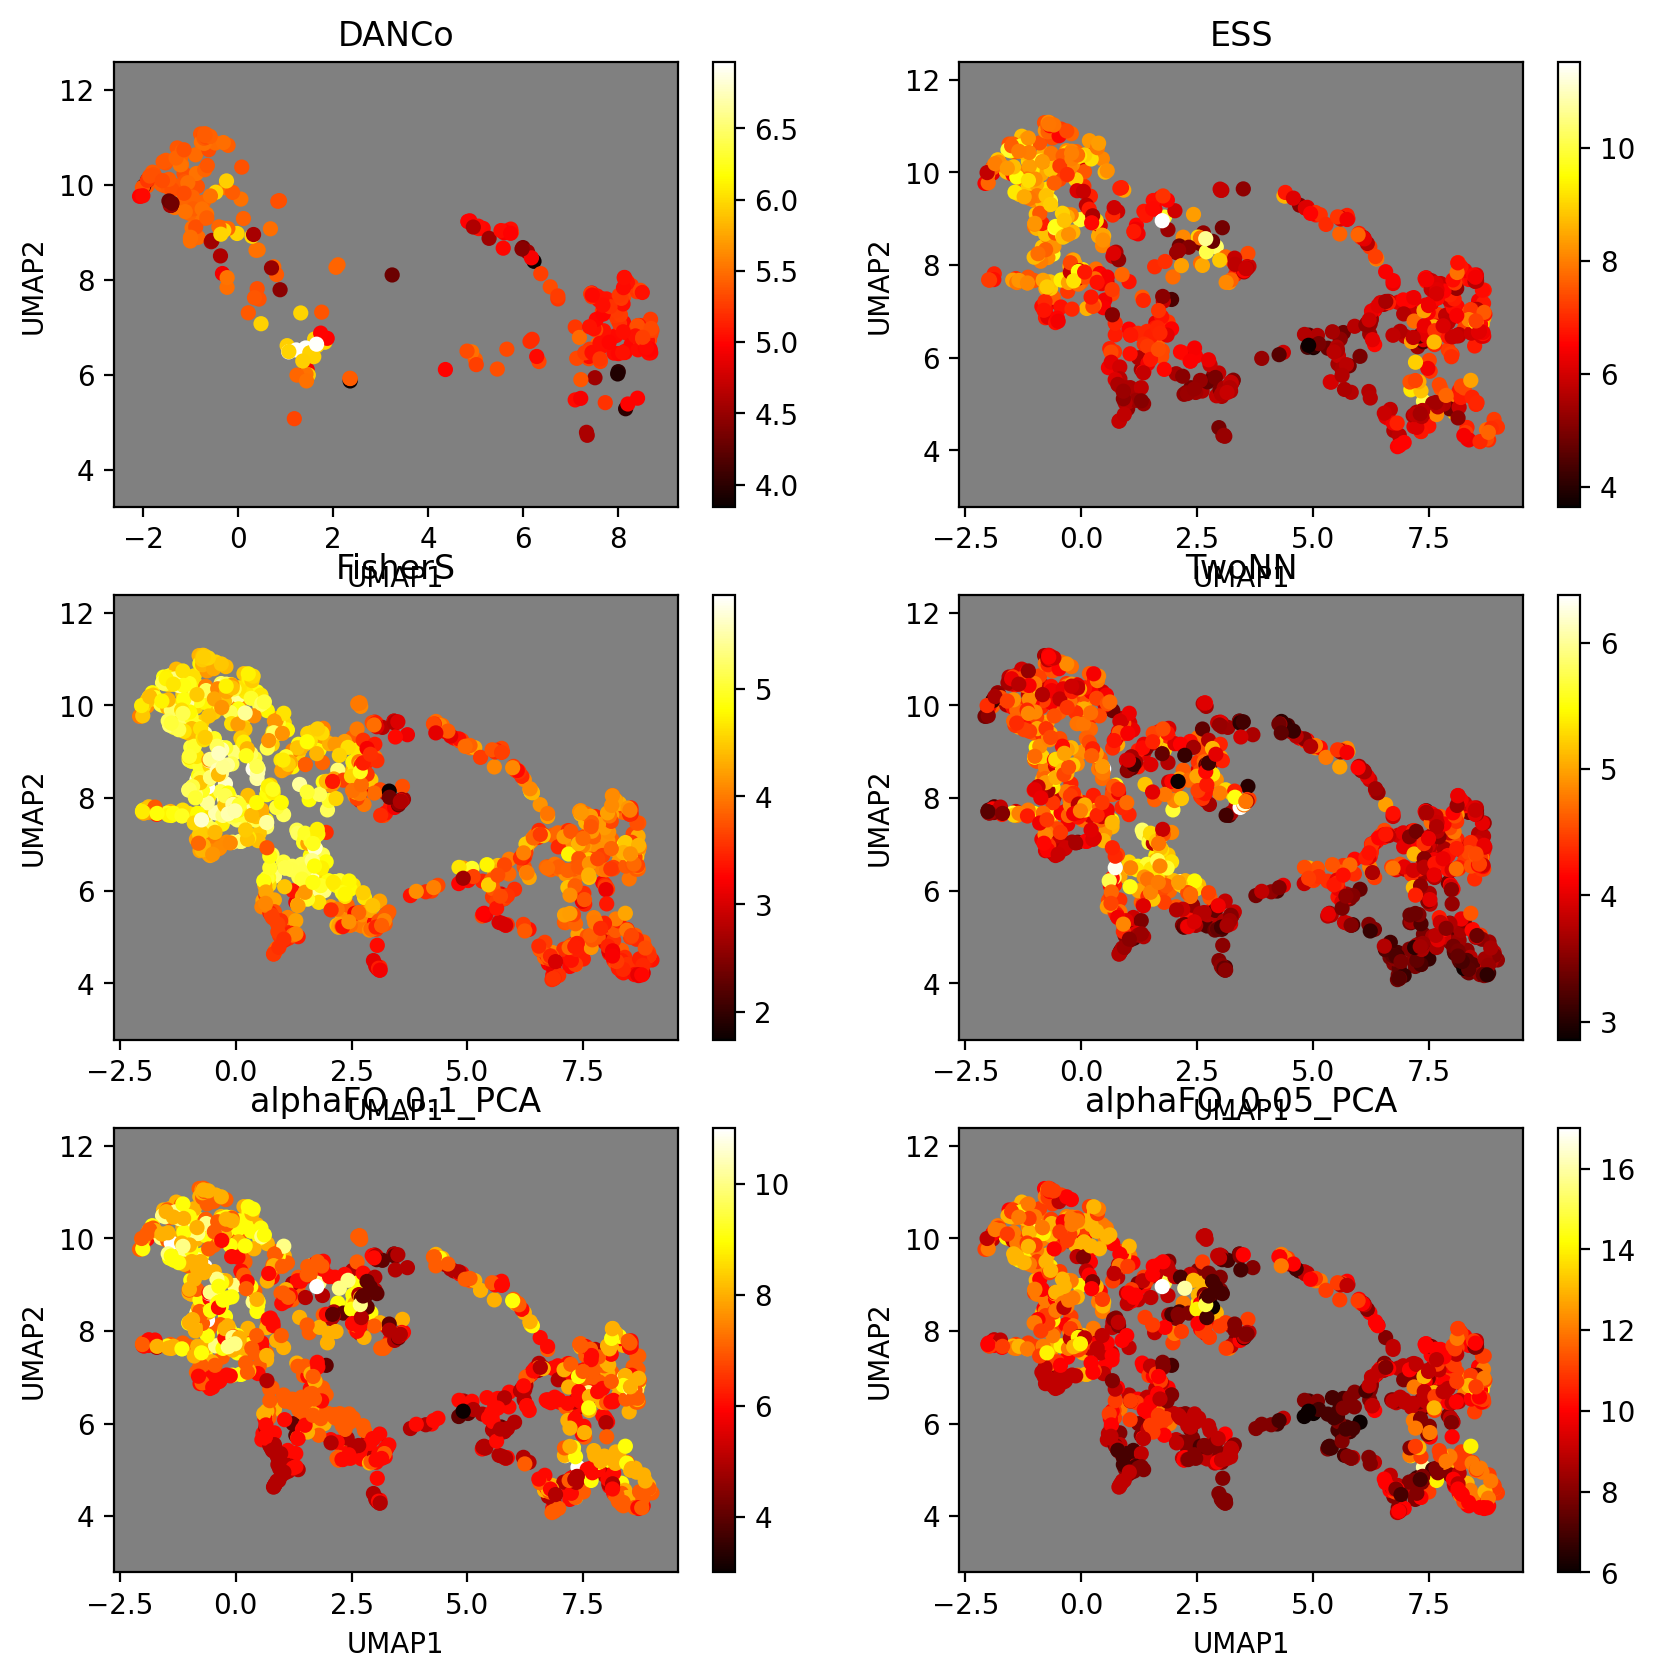

In [259]:
methods = ['DANCo','ESS','FisherS','TwoNN','alphaFO_0.1_PCA','alphaFO_0.05_PCA']

plt.figure(figsize=(10,10))

for i,method in enumerate(methods):
    plt.subplot(3,2,i+1)
    plt.scatter(umap_coords[:,0],umap_coords[:,1],c=np.array(id_results[method]),cmap='hot',s=20)
    plt.colorbar()
    plt.axis('equal')
    plt.title(method)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')

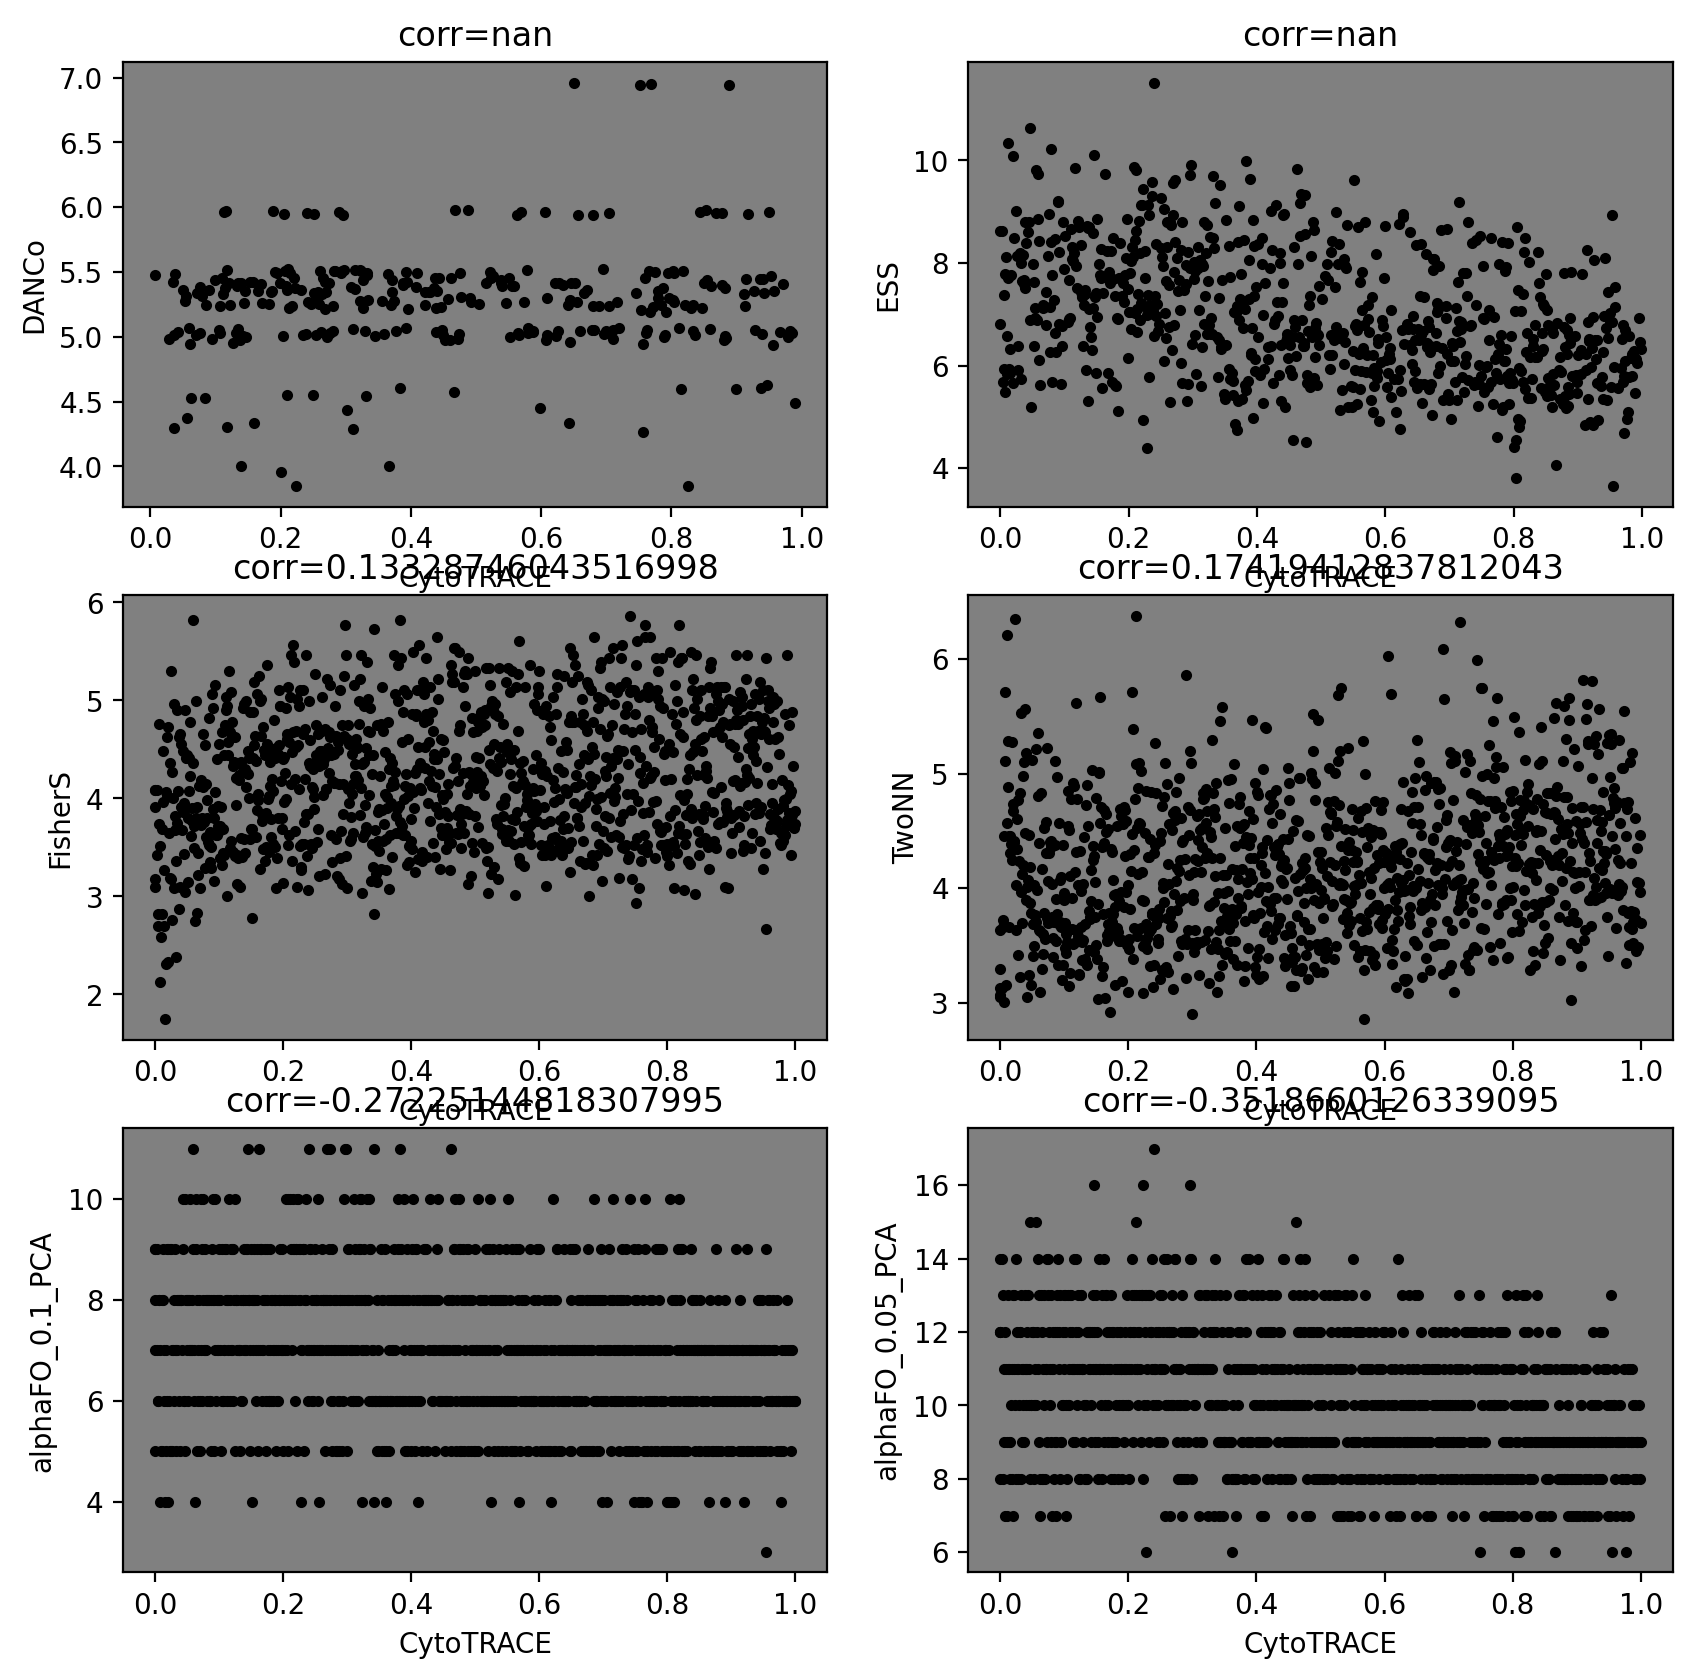

In [266]:
methods = ['DANCo','ESS','FisherS','TwoNN','alphaFO_0.1_PCA','alphaFO_0.05_PCA']

plt.figure(figsize=(10,10))

for i,method in enumerate(methods):
    plt.subplot(3,2,i+1)
    plt.plot(cytotrace_score_aligned,id_results[method],'k.')
    plt.title('corr='+str(stats.spearmanr(cytotrace_score_aligned,id_results[method]).correlation))
    plt.xlabel('CytoTRACE')
    plt.ylabel(method)